# Loading Data

In [1455]:
# Installing all required libraries

import numpy as np
import pandas as pd

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

%pip install sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


from scipy.stats import randint

%pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1456]:
yellow_taxi_df = pd.read_parquet('yellow_tripdata_2024-12.parquet')

# Data Exploration

In this section, we will explore the dataset and understand its characteristics and data.

In [1457]:
yellow_taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0000,9.7600,1.0000,N,138,33,1,38.0000,6.0000,0.5000,4.7200,0.0000,1.0000,51.9700,0.0000,1.7500
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0000,7.6200,1.0000,N,158,42,1,37.3000,1.0000,0.5000,8.4600,0.0000,1.0000,50.7600,2.5000,0.0000
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0000,20.0700,2.0000,N,132,236,2,70.0000,0.0000,0.5000,0.0000,6.9400,1.0000,82.6900,2.5000,1.7500
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0000,2.3400,1.0000,N,142,186,1,15.6000,1.0000,0.5000,4.1200,0.0000,1.0000,24.7200,2.5000,0.0000
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0000,5.0500,1.0000,N,107,80,1,26.8000,1.0000,0.5000,5.0000,0.0000,1.0000,36.8000,2.5000,0.0000


In [1458]:
yellow_taxi_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,NaN,10.7100,NaN,None,16,7,0,-4.1300,0.0000,0.5000,0.0000,0.0000,1.0000,-2.6300,NaN,NaN
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,NaN,4.5600,NaN,None,252,16,0,-1.6800,0.0000,0.5000,0.0000,0.0000,1.0000,-0.1800,NaN,NaN
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,NaN,3.9400,NaN,None,181,255,0,4.4600,0.0000,0.5000,5.1900,0.0000,1.0000,11.1500,NaN,NaN
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,NaN,4.2000,NaN,None,165,61,0,27.0700,0.0000,0.5000,0.0000,0.0000,1.0000,28.5700,NaN,NaN
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,NaN,5.7600,NaN,None,225,114,0,2.1700,0.0000,0.5000,0.0000,0.0000,1.0000,6.1700,NaN,NaN


In [1459]:
yellow_taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3668371.0000,3668371,3668371,3342080.0000,3668371.0000,3342080.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3668371.0000,3342080.0000,3342080.0000
mean,1.7747,2024-12-15 07:08:54.224627,2024-12-15 07:27:35.844428,1.3624,5.0878,2.3283,164.8840,163.7911,1.1335,19.6613,1.3559,0.4746,3.4595,0.5570,0.9516,28.3204,2.2214,0.1282
min,1.0000,2008-12-31 23:03:59,2009-01-01 00:30:36,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,-975.0000,-9.2500,-0.5000,-80.0000,-70.3800,-1.0000,-951.0000,-2.5000,-1.7500
25%,2.0000,2024-12-08 00:30:19,2024-12-08 00:46:27.500000,1.0000,0.9700,1.0000,132.0000,113.0000,1.0000,9.3000,0.0000,0.5000,0.0000,0.0000,1.0000,15.9600,2.5000,0.0000
50%,2.0000,2024-12-14 16:33:04,2024-12-14 16:54:20,1.0000,1.6800,1.0000,162.0000,162.0000,1.0000,14.2000,1.0000,0.5000,2.7200,0.0000,1.0000,21.6600,2.5000,0.0000
75%,2.0000,2024-12-21 13:15:27,2024-12-21 13:31:43,1.0000,3.2500,1.0000,234.0000,234.0000,1.0000,23.9200,2.5000,0.5000,4.4800,0.0000,1.0000,32.1000,2.5000,0.0000
max,7.0000,2025-03-23 20:42:06,2025-03-23 22:52:56,9.0000,328827.6300,99.0000,265.0000,265.0000,4.0000,3033.1000,14.2500,10.5000,471.0000,120.1500,1.0000,3037.1000,2.5000,1.7500
std,0.4227,NaN,NaN,0.8233,472.8321,10.9320,64.3414,69.5844,0.6746,19.8189,1.7995,0.1453,4.1806,2.2475,0.2893,24.6453,0.9137,0.4759


In [1460]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668371 entries, 0 to 3668370
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [1461]:
print(yellow_taxi_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


# Handling Data

### Sampling Data (for this project)

Since we only have limited API calls for OpenWeather, we will limit the dataset to only 2000 rows.

In [1462]:
yellow_taxi_df.sample(2000)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2656363,2,2024-12-22 19:14:12,2024-12-22 19:17:04,3.0000,0.3000,1.0000,N,90,186,1,5.1000,0.0000,0.5000,0.0000,0.0000,1.0000,9.1000,2.5000,0.0000
2139545,2,2024-12-18 15:06:55,2024-12-18 15:19:43,1.0000,1.3200,1.0000,N,263,237,2,12.8000,0.0000,0.5000,0.0000,0.0000,1.0000,16.8000,2.5000,0.0000
1386629,2,2024-12-12 15:00:33,2024-12-12 15:09:44,1.0000,0.9300,1.0000,N,107,170,1,10.0000,0.0000,0.5000,2.8000,0.0000,1.0000,16.8000,2.5000,0.0000
2370691,2,2024-12-20 10:09:35,2024-12-20 10:17:04,1.0000,0.4900,1.0000,N,230,100,2,7.9000,0.0000,0.5000,0.0000,0.0000,1.0000,11.9000,2.5000,0.0000
2950901,2,2024-12-27 06:32:59,2024-12-27 06:43:33,1.0000,2.1700,1.0000,N,263,43,2,13.5000,0.0000,0.5000,0.0000,0.0000,1.0000,17.5000,2.5000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394620,2,2024-12-12 16:34:26,2024-12-12 16:38:53,1.0000,1.0100,1.0000,N,237,236,1,7.2000,2.5000,0.5000,2.7400,0.0000,1.0000,16.4400,2.5000,0.0000
2775191,2,2024-12-24 12:25:16,2024-12-24 12:37:34,1.0000,1.2100,1.0000,N,237,140,4,-12.1000,0.0000,-0.5000,0.0000,0.0000,-1.0000,-16.1000,-2.5000,0.0000
967413,2,2024-12-09 09:10:43,2024-12-09 09:23:01,1.0000,2.0200,1.0000,N,239,166,1,13.5000,0.0000,0.5000,2.0000,0.0000,1.0000,19.5000,2.5000,0.0000
2484157,2,2024-12-21 09:41:53,2024-12-21 09:47:08,1.0000,0.6600,1.0000,N,161,230,1,6.5000,0.0000,0.5000,3.1500,0.0000,1.0000,13.6500,2.5000,0.0000


In [1463]:
# supress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

yellow_taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3668371.00,3668371,3668371,3342080.00,3668371.00,3342080.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3668371.00,3342080.00,3342080.00
mean,1.77,2024-12-15 07:08:54.224627,2024-12-15 07:27:35.844428,1.36,5.09,2.33,164.88,163.79,1.13,19.66,1.36,0.47,3.46,0.56,0.95,28.32,2.22,0.13
min,1.00,2008-12-31 23:03:59,2009-01-01 00:30:36,0.00,0.00,1.00,1.00,1.00,0.00,-975.00,-9.25,-0.50,-80.00,-70.38,-1.00,-951.00,-2.50,-1.75
25%,2.00,2024-12-08 00:30:19,2024-12-08 00:46:27.500000,1.00,0.97,1.00,132.00,113.00,1.00,9.30,0.00,0.50,0.00,0.00,1.00,15.96,2.50,0.00
50%,2.00,2024-12-14 16:33:04,2024-12-14 16:54:20,1.00,1.68,1.00,162.00,162.00,1.00,14.20,1.00,0.50,2.72,0.00,1.00,21.66,2.50,0.00
75%,2.00,2024-12-21 13:15:27,2024-12-21 13:31:43,1.00,3.25,1.00,234.00,234.00,1.00,23.92,2.50,0.50,4.48,0.00,1.00,32.10,2.50,0.00
max,7.00,2025-03-23 20:42:06,2025-03-23 22:52:56,9.00,328827.63,99.00,265.00,265.00,4.00,3033.10,14.25,10.50,471.00,120.15,1.00,3037.10,2.50,1.75
std,0.42,NaN,NaN,0.82,472.83,10.93,64.34,69.58,0.67,19.82,1.80,0.15,4.18,2.25,0.29,24.65,0.91,0.48


There are several key points we can observe and understand from the table above:
- The data spans from the year 2002 to 2024.
- The maximum number of passenger in a yellow cab is only 5 passengers (usually 4), yet the maximum of passenger_count shown is 9.
- The maximum trip distance in this dataset is 398,609 miles, which is illogical for a taxi trip.
- The minimum fare amount is -$1458, which indicates the existence of voided/refunded transactions in this dataset. This can be observed in other variables including 'extra','mta_tax','tip_amount' and other related financial data as well.

Some of these key points will be handled Outliers section. But firstly, we will start by removing columns that are irrelevant to the project.

### Removing Columns

The following list is the columns that will be removed:
- RatecodeID: Mostly redundant unless you're distinguishing airport rides.
- Payment Type: Not relevant for trip duration.
- Tolls Amount: More related to fare prediction than duration.
- Mta_tax: More related to fare prediction than duration.
- Tip_amount: A feature which contains information that wouldn’t be available at prediction time.
- Total_amount: A feature which contains information that wouldn’t be available at prediction time.
- Fare_amount: A feature which contains information that wouldn’t be available at prediction time.
- Passenger_count: Not relevant for trip duration.
- Airport_fee: Not relevant for trip duration.
- Store_and_fwd_flag: Not relevant for trip duration.

These columns does not show relevance to the target variable (Trip duration).

In [1464]:
irrelevant_cols = [
    'VendorID','RatecodeID','store_and_fwd_flag',
    'payment_type','mta_tax','fare_amount','Airport_fee','passenger_count',
    'tip_amount','tolls_amount','improvement_surcharge','total_amount'
]

for column in irrelevant_cols:
   yellow_taxi_df.drop(column, axis=1, inplace=True)
   print(f'{column} has been dropped.')

VendorID has been dropped.
RatecodeID has been dropped.
store_and_fwd_flag has been dropped.
payment_type has been dropped.
mta_tax has been dropped.
fare_amount has been dropped.
Airport_fee has been dropped.
passenger_count has been dropped.
tip_amount has been dropped.
tolls_amount has been dropped.
improvement_surcharge has been dropped.
total_amount has been dropped.


In [1465]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668371 entries, 0 to 3668370
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   trip_distance          float64       
 3   PULocationID           int32         
 4   DOLocationID           int32         
 5   extra                  float64       
 6   congestion_surcharge   float64       
dtypes: datetime64[us](2), float64(3), int32(2)
memory usage: 167.9 MB


### Handling Missing Data

Checking NaN values in all attributes

In [1466]:
percent_missing = yellow_taxi_df.isnull().sum() / len(yellow_taxi_df) * 100
print(percent_missing)

tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
trip_distance           0.00
PULocationID            0.00
DOLocationID            0.00
extra                   0.00
congestion_surcharge    8.89
dtype: float64


The percentage of missing values in 'congestion_surcharge' is 8.89%. This is a slightly significant amount of missing values (>5%), thus we must handle these missing data carefully.

Thus, we will first look at the distribution of this feature.

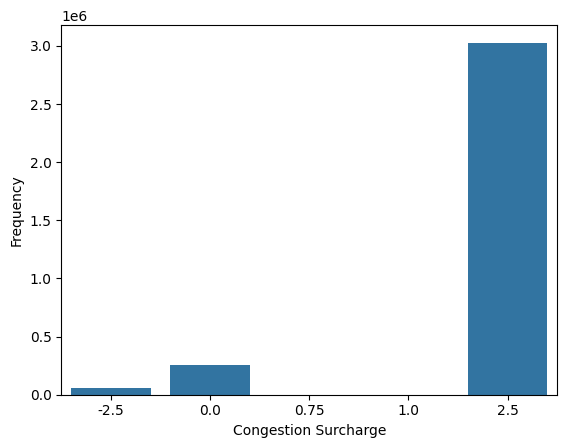

In [1467]:
sns.countplot(x=yellow_taxi_df['congestion_surcharge'])
plt.xlabel("Congestion Surcharge")
plt.ylabel("Frequency")
plt.show()

The figure above shows that most trips will apply congestion surcharge of $2.50. Thus, we will use **mode** to impute the missing data as well.

- Notice how there is a negative value too, in this feature. But we will handle this in the Dealing with Outliers section!

In [1468]:
yellow_taxi_df.fillna({'congestion_surcharge':yellow_taxi_df['congestion_surcharge'].mode()}, inplace=True)

print(yellow_taxi_df['congestion_surcharge'].isnull().sum())

326291


### Checking Duplicates

It is a crucial step to check for duplicates as this will have a major consequence on the model performance, depending on the amount of duplicates in the dataset.

In [1469]:
# Check for duplicate rows
duplicates = yellow_taxi_df.duplicated()

# count total number of duplicates
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {num_of_duplicates}')
print(f'Percentage of duplicate rows in dataset:{num_of_duplicates / len(yellow_taxi_df) * 100}%')

yellow_taxi_df[duplicates]

Total number of duplicate rows: 4784
Percentage of duplicate rows in dataset:0.13041210935317066%


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,congestion_surcharge
2156,2024-12-01 00:07:47,2024-12-01 00:14:25,3.82,132,10,0.00,0.00
3221,2024-12-01 00:36:05,2024-12-01 00:36:10,0.01,132,132,0.00,0.00
3268,2024-12-01 00:11:44,2024-12-01 00:33:53,13.09,28,41,0.00,0.00
3972,2024-12-01 01:00:54,2024-12-01 01:20:17,7.86,246,265,0.00,0.00
5399,2024-12-01 01:41:49,2024-12-01 01:41:58,0.00,146,146,0.00,0.00
...,...,...,...,...,...,...,...
3333427,2024-12-31 21:31:23,2024-12-31 21:53:16,6.54,211,265,0.00,0.00
3337999,2024-12-31 22:56:29,2024-12-31 23:06:18,3.79,132,10,0.00,0.00
3338385,2024-12-31 22:31:32,2024-12-31 23:42:38,42.34,4,265,0.00,0.00
3341144,2024-12-31 23:43:33,2024-12-31 23:44:58,0.26,116,116,0.00,0.00


From above, there are 4,833 rows of which are duplicates. This is about 0.133% of the whole dataset. As it is not a significant amount, these duplicates must be eliminated to properly clean the data.

In [1470]:
yellow_taxi_df.drop_duplicates(inplace=True)

In [1471]:
# Check again for duplicate rows
duplicates = yellow_taxi_df.duplicated()
num_of_duplicates = duplicates.sum()
print(f'Total number of duplicate rows now: {num_of_duplicates}')

Total number of duplicate rows now: 0


### Outliers

#### Trip Distance

<Axes: ylabel='trip_distance'>

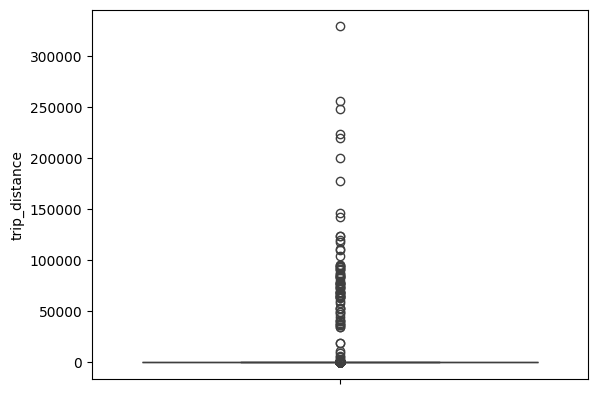

In [1472]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

Since distance can have rare long trips, thus making it skewed, we will use the IQR method to cap the outliers.

(UPDATE: It has been identified that **capping the outliers was not a good approach** as it introduces high frequency of datapoints near the outlier bound which may decrease accuracy of the model. Thus outliers will be removed instead.)

In [1473]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_distance'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_distance'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers crossing the bounds
yellow_taxi_df = yellow_taxi_df.loc[
    (yellow_taxi_df['trip_distance'] <= upper_bound) &
    (yellow_taxi_df['trip_distance'] >= lower_bound)
]

<Axes: ylabel='trip_distance'>

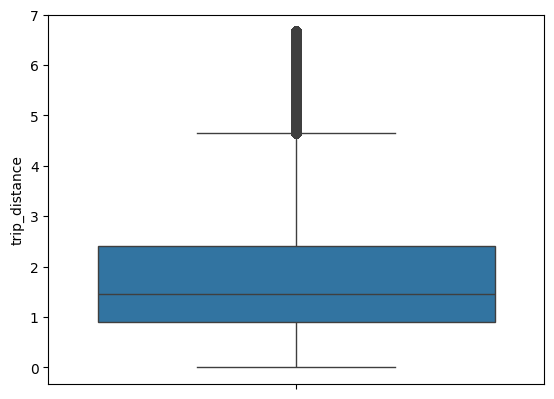

In [1474]:
sns.boxplot(yellow_taxi_df, y='trip_distance')

Removing Datapoints where Trip Distance is 0 (Invalid Trip)

In [1475]:
# Remove datapoints with distance of 0
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['trip_distance']>0]

#### Extra

<Axes: ylabel='extra'>

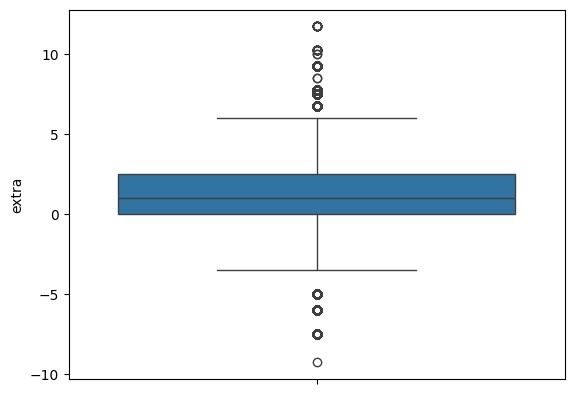

In [1476]:
sns.boxplot(yellow_taxi_df, y='extra')

Negative values in 'extra' indicates reverse transactions, or refunds, thus we will not require this data. To handle this, first we look at the percentage of rows with such values.

In [1477]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['extra'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.8535275559913116


<Axes: ylabel='extra'>

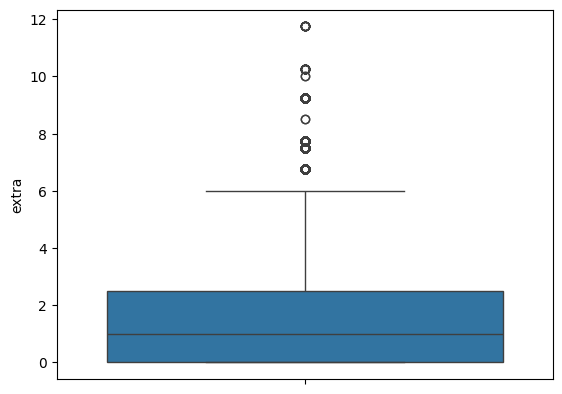

In [1478]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['extra'] >= 0]
sns.boxplot(yellow_taxi_df, y='extra')

#### Congestion Surcharge

<Axes: ylabel='congestion_surcharge'>

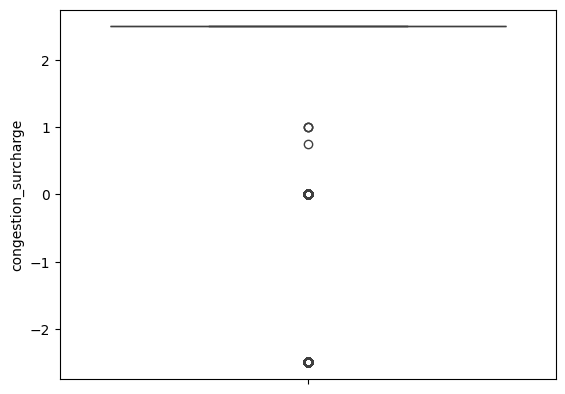

In [1479]:
sns.boxplot(yellow_taxi_df, y='congestion_surcharge')

In [1480]:
print(f"Percentage of Rows with Negative Values in 'extra': {len(yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'extra': 0.7689689182937793


Here, we will only keep rows with whole numbers for 'congestion_surcharge'.

In [1481]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['congestion_surcharge'] >= 0]

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


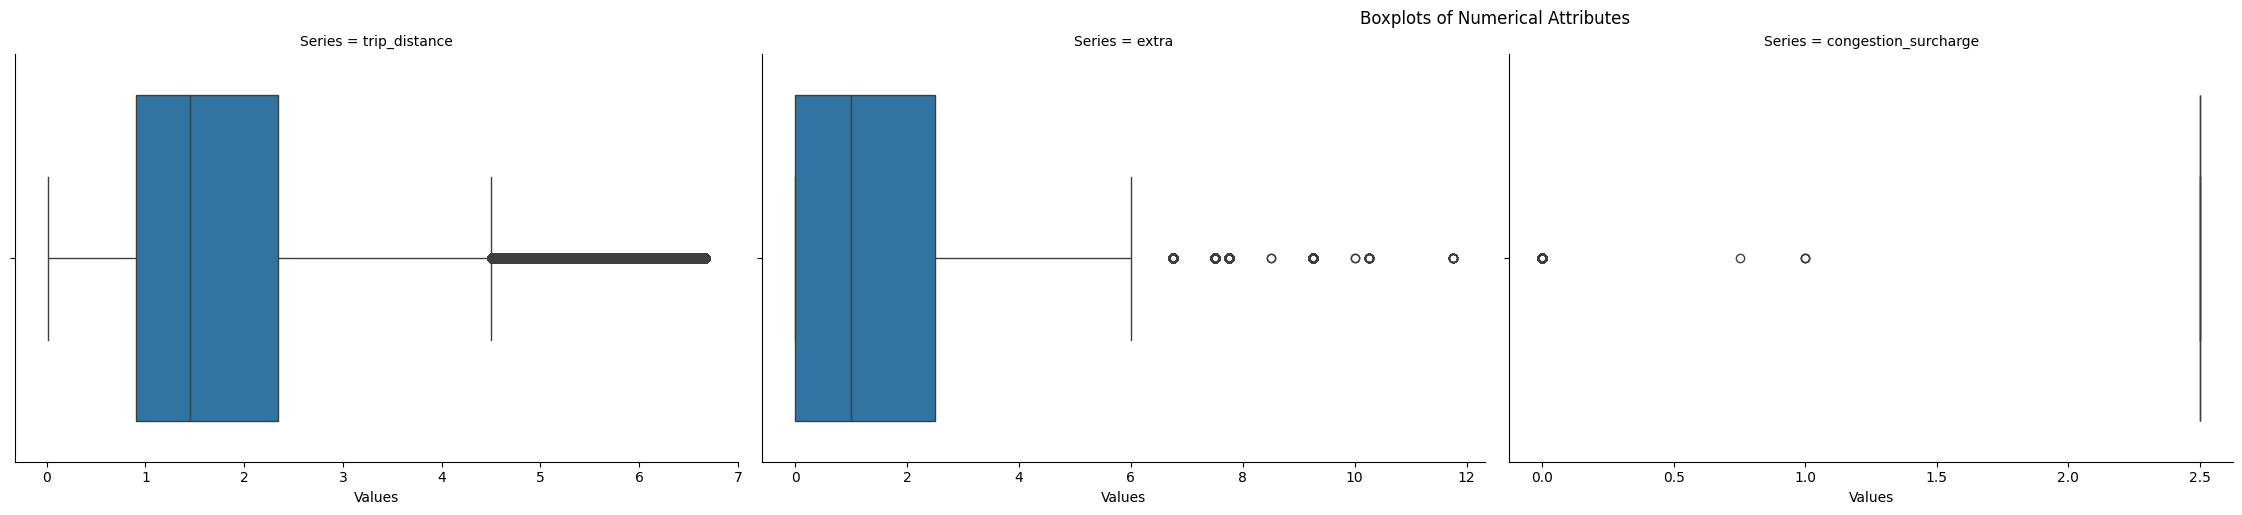

In [1482]:
numerical_df = pd.DataFrame(yellow_taxi_df[['trip_distance','extra','congestion_surcharge']])

numerical_melted_df = numerical_df.melt(var_name='Series',value_name='Values')

graph = sns.FacetGrid(numerical_melted_df, col='Series', sharex=False, sharey=False, height=5, aspect=1.5, col_wrap=4)
graph.map(sns.boxplot, 'Values')
graph.fig.suptitle('Boxplots of Numerical Attributes', y=1.02)

plt.show()

# Data Transformation

### Creating 'Route' Feature

In [1483]:
yellow_taxi_df['route'] = yellow_taxi_df["PULocationID"].astype(str) + "-" + yellow_taxi_df["DOLocationID"].astype(str)

yellow_taxi_df.sample(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,congestion_surcharge,route
1920704,2024-12-16 17:43:33,2024-12-16 17:51:17,0.75,140,262,2.50,2.50,140-262
1273600,2024-12-11 18:11:05,2024-12-11 18:24:56,1.20,164,79,5.00,2.50,164-79
1331678,2024-12-12 07:04:41,2024-12-12 07:20:55,3.30,163,211,2.50,2.50,163-211
180279,2024-12-02 20:59:37,2024-12-02 21:08:23,1.36,239,238,1.00,2.50,239-238
2666123,2024-12-22 22:51:58,2024-12-22 23:08:16,3.13,68,237,1.00,2.50,68-237
1499295,2024-12-13 11:02:42,2024-12-13 11:49:03,5.00,48,193,2.50,2.50,48-193
2387990,2024-12-20 13:14:22,2024-12-20 13:28:06,2.75,230,158,0.00,2.50,230-158
2302080,2024-12-19 19:21:34,2024-12-19 19:30:53,1.66,151,75,2.50,0.00,151-75
1451468,2024-12-12 22:49:05,2024-12-12 22:58:09,1.35,233,141,1.00,2.50,233-141
248380,2024-12-03 15:42:16,2024-12-03 15:57:20,1.50,237,170,2.50,2.50,237-170


In [1484]:
yellow_taxi_df['route'].nunique()

12525

#### Frequency Encoding

In [1485]:
route_counts = yellow_taxi_df['route'].value_counts()
yellow_taxi_df['route_freq'] = yellow_taxi_df['route'].map(route_counts)

yellow_taxi_df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,congestion_surcharge,route,route_freq
3,2024-12-01 00:18:16,2024-12-01 00:33:16,2.34,142,186,1.00,2.50,142-186,1390
4,2024-12-01 00:56:13,2024-12-01 01:18:25,5.05,107,80,1.00,2.50,107-80,55
5,2024-12-01 00:21:17,2024-12-01 00:37:22,4.30,249,141,3.50,2.50,249-141,680
7,2024-12-01 00:15:28,2024-12-01 00:20:13,0.30,148,148,3.50,2.50,148-148,936
9,2024-12-01 00:00:21,2024-12-01 00:05:27,0.72,211,231,1.00,2.50,211-231,1343
10,2024-12-01 00:07:13,2024-12-01 00:20:57,3.54,231,48,1.00,2.50,231-48,730
11,2024-12-01 00:34:04,2024-12-01 00:44:33,1.38,68,137,1.00,2.50,68-137,837
12,2024-12-01 00:57:27,2024-12-01 01:00:44,0.45,230,162,1.00,2.50,230-162,2838
13,2024-12-01 00:02:07,2024-12-01 00:19:36,2.70,100,239,3.50,2.50,100-239,796
15,2024-12-01 00:07:12,2024-12-01 00:07:25,0.03,262,140,1.00,2.50,262-140,3694


In [1486]:
yellow_taxi_df.drop(columns='route',inplace=True)

### Creating 'Trip Duration' Feature

In [1487]:
yellow_taxi_df['trip_duration_in_mins'] = (yellow_taxi_df['tpep_dropoff_datetime'] - yellow_taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60

yellow_taxi_df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,congestion_surcharge,route_freq,trip_duration_in_mins
3,2024-12-01 00:18:16,2024-12-01 00:33:16,2.34,142,186,1.00,2.50,1390,15.00
4,2024-12-01 00:56:13,2024-12-01 01:18:25,5.05,107,80,1.00,2.50,55,22.20
5,2024-12-01 00:21:17,2024-12-01 00:37:22,4.30,249,141,3.50,2.50,680,16.08
7,2024-12-01 00:15:28,2024-12-01 00:20:13,0.30,148,148,3.50,2.50,936,4.75
9,2024-12-01 00:00:21,2024-12-01 00:05:27,0.72,211,231,1.00,2.50,1343,5.10
10,2024-12-01 00:07:13,2024-12-01 00:20:57,3.54,231,48,1.00,2.50,730,13.73
11,2024-12-01 00:34:04,2024-12-01 00:44:33,1.38,68,137,1.00,2.50,837,10.48
12,2024-12-01 00:57:27,2024-12-01 01:00:44,0.45,230,162,1.00,2.50,2838,3.28
13,2024-12-01 00:02:07,2024-12-01 00:19:36,2.70,100,239,3.50,2.50,796,17.48
15,2024-12-01 00:07:12,2024-12-01 00:07:25,0.03,262,140,1.00,2.50,3694,0.22


In [1488]:
yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,congestion_surcharge,route_freq,trip_duration_in_mins
135576,2024-12-02 14:30:00,2024-12-02 14:06:39,2.50,48,79,0.00,0.00,795,-23.35
731014,2024-12-07 04:28:00,2024-12-07 04:24:28,0.50,216,216,0.00,0.00,312,-3.53
1772332,2024-12-15 09:30:00,2024-12-15 09:24:20,0.70,166,41,0.00,0.00,591,-5.67
1904747,2024-12-16 14:30:00,2024-12-16 14:02:41,2.40,168,119,0.00,0.00,5,-27.32
1992884,2024-12-17 11:45:00,2024-12-17 11:29:46,3.40,76,188,0.00,0.00,25,-15.23
2687093,2024-12-23 10:00:00,2024-12-23 09:50:33,1.60,63,76,0.00,0.00,15,-9.45
3277840,2024-12-31 10:30:00,2024-12-31 10:18:08,6.50,61,29,0.00,0.00,1,-11.87
3290768,2024-12-31 13:00:00,2024-12-31 12:46:37,0.50,89,71,0.00,0.00,26,-13.38
3291742,2024-12-31 13:00:00,2024-12-31 12:59:12,2.30,76,61,0.00,0.00,40,-0.80


The statistics above show the existence of negative values in 'trip_duration_in_mins', which is impossible in nature. Thus, we need to decide the next step for these rows.

In [1489]:
print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.00032072549532489135


Since the percentage of rows with negative values in 'trip_duration_in_mins' is very small and insignificant, it is acceptable to remove them.

In [1490]:
yellow_taxi_df = yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] >= 0]

print(f"Percentage of Rows with Negative Values in 'trip_duration_in_mins': {len(yellow_taxi_df.loc[yellow_taxi_df['trip_duration_in_mins'] < 0]) / len(yellow_taxi_df) * 100}")

Percentage of Rows with Negative Values in 'trip_duration_in_mins': 0.0


In [1491]:
yellow_taxi_df['trip_duration_in_mins'].describe()

count   2806129.00
mean         14.91
std          32.83
min           0.00
25%           7.35
50%          11.97
75%          18.77
max        5992.25
Name: trip_duration_in_mins, dtype: float64

Next, let's have a look at the feature's distribution using boxplot.

<Axes: xlabel='trip_duration_in_mins'>

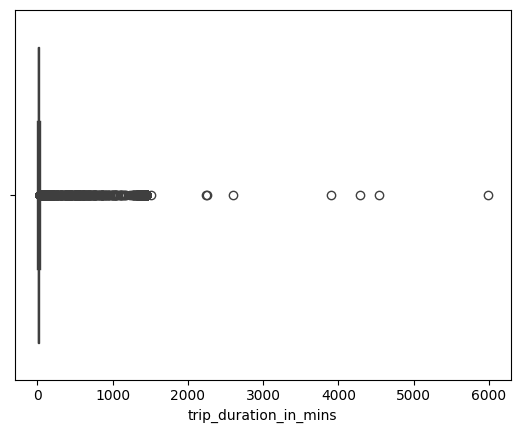

In [1492]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

The long tails in the boxplot figure above indicates extreme skewness, thus, the outliers will be capped using the IQR method instead of using Z-score.

(UPDATE: Similarly to 'trip_distance', capping the outliers was not an effective approach, thus outliers will be removed.)

#### Removing Outliers in 'trip_duration_in_mins'

In [1493]:
# Calculate IQR
Q1 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.25)  # 25th percentile
Q3 = yellow_taxi_df['trip_duration_in_mins'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers crossing the bounds
yellow_taxi_df = yellow_taxi_df.loc[
    (yellow_taxi_df['trip_duration_in_mins'] <= upper_bound) &
    (yellow_taxi_df['trip_duration_in_mins'] >= lower_bound)
]

<Axes: xlabel='trip_duration_in_mins'>

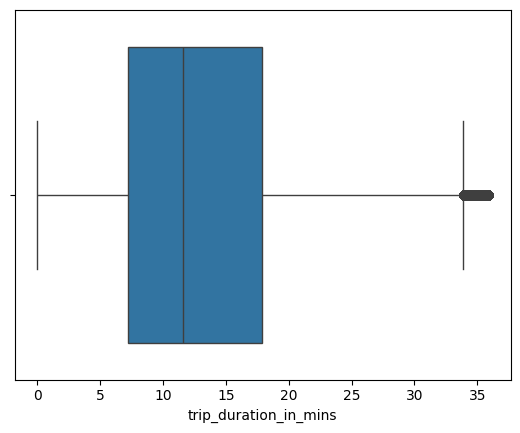

In [1494]:
sns.boxplot(x=yellow_taxi_df['trip_duration_in_mins'])

Now that the outliers for our new feature 'trip_duration_in_mins' are handled, let's take a look at the histogram of the feature.

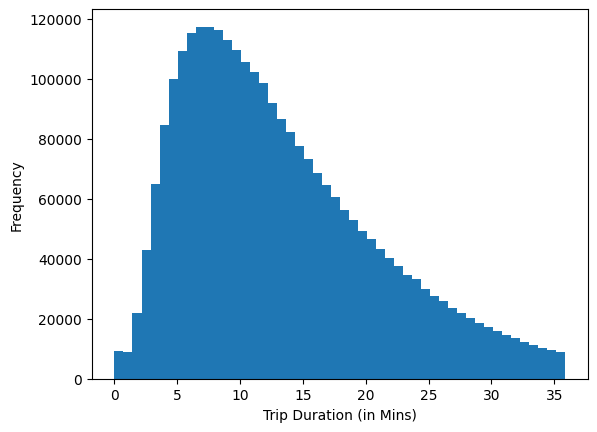

In [1495]:
plt.hist(yellow_taxi_df['trip_duration_in_mins'],bins=50)
plt.xlabel("Trip Duration (in Mins)")
plt.ylabel("Frequency")
plt.show()

The histogram above shows a skewedness towards the left. This shows that there are more data collected for trips with durations around 5-15 minutes. Moreover, this shows an **imbalace** in the dataset, which is important to acknowledge.

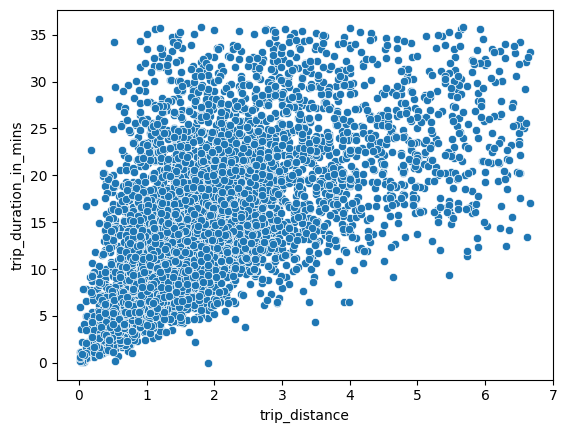

In [1496]:
# Take a random sample of rows (adjust as needed)
sample_df = yellow_taxi_df.sample(n=7000, random_state=42) 

sns.scatterplot(x=sample_df['trip_distance'], y=sample_df['trip_duration_in_mins'])
plt.show()

Now that the extreme outliers have been removed, the pairplot provides a clearer insight into the data. 

##### Analysis
- The scatterplot reveals a **linear relationship** between trip distance and duration within the **0 to 2-mile range**. However, for trips exceeding 2 miles, the duration becomes more **variable**. This variation is expected, as longer routes are more susceptible to **traffic congestion**, which can be influenced by factors such as **road-related incidents, overall traffic flow, and nearby events**. These insights highlight the complexity of travel time predictions in urban environments.

##### Further Identification of Outliers
The scatterplot reveals several additional outliers that may be invalid or illogical. For instance, it is unrealistic for a trip with a distance of 3 miles to be completed in less than 2 minutes. These data points likely warrant further scrutiny and possible removal or correction.

In [1497]:
# Manually removing additional invalid outliers
yellow_taxi_df = yellow_taxi_df.loc[~((yellow_taxi_df['trip_distance'] > 2) & (yellow_taxi_df['trip_duration_in_mins'] < 3))]

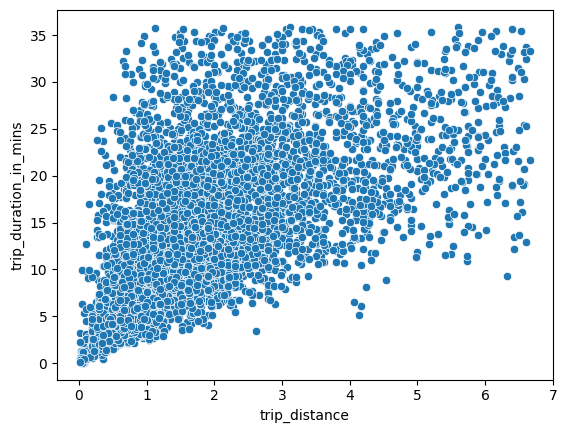

In [1498]:
# Take a random sample of rows (adjust as needed)
sample_df = yellow_taxi_df.sample(n=7000, random_state=42) 

sns.scatterplot(x=sample_df['trip_distance'], y=sample_df['trip_duration_in_mins'])
plt.show()

### Building the Peak Times & Busy Days Features

#### Peak Times (Group By Hour)

To analyse the peak times and days, we will analyse the Pick-up Time from the 'tpep_pickup_datetime' variable, as it the number of trips started during peak times and on busy days. Otherwise, choosing Drop-off Time ('tpep_dropoff_datetime') would be inaccurate as trips may end at different times from the actual peak hours of the day.

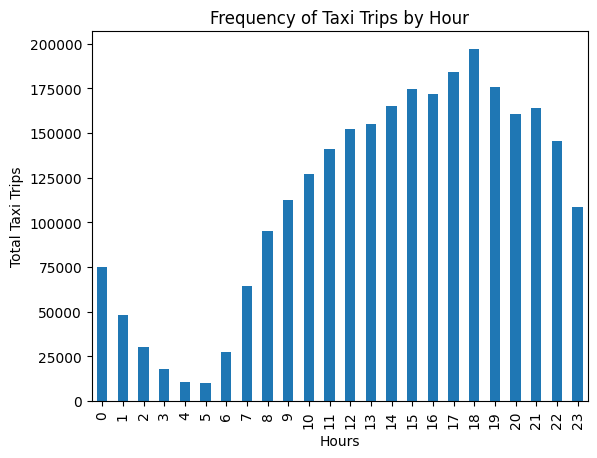

In [1499]:
#Create a new column called 'hour' to extract the hour from each trip in the dataset
yellow_taxi_df['hour'] = yellow_taxi_df['tpep_pickup_datetime'].dt.hour

#Create a separate DataFrame to count the number of occurences per hour
peak_times_df = yellow_taxi_df.groupby('hour').size()

#Create a bar graph using the peak_times_df
peak_times_df.plot(kind='bar',x='hour',y='Value')

plt.xlabel('Hours')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Hour')

plt.show()


From the graph above, we can observe that:

- NYC taxi services experience a noticeable increase in activity starting at 5 am, with the most significant rise in the number of trips occurring between 6 am and 7 am. This aligns with the typical rush hour, as people begin commuting to work or school. 

- The peak period of the day occurs at 6 pm, which corresponds with the evening rush, when people are likely leaving work and heading home or to other activities. 

- Following this, there is a sharp decline in taxi trips from 6 pm to 7 pm, which indicates that the demand for taxis decreases significantly after the peak commuting hours. This suggests that the bulk of taxi usage is tied to regular work hours and commuting patterns, with a clear drop-off in demand once people are settled at home or finished with their workday.

#### Busy Days of the Week (Group by Weekdays)

For the purpose of visualising the data for busy days, we will use the **.dt.day_name()** function. 

Though we can use **.dt.weekday** (returns from 0 - Monday to 6 - Saturday) for 'datetime' data types, the ML model will recognise this as continuous variable, instead of categorical. Thus, we will use one-hot-encoding for the newly created feature 'weekday' instead.

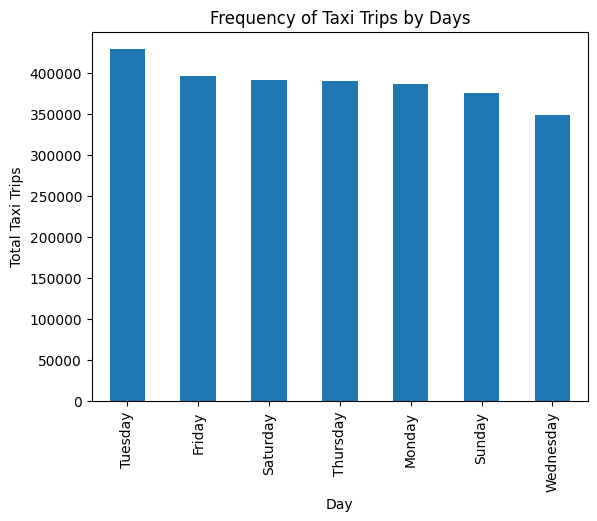

In [1500]:
yellow_taxi_df['weekday'] = yellow_taxi_df['tpep_pickup_datetime'].dt.day_name()  # Extract weekday first

#Create a separate DataFrame to visualise the occurences of trips by weekday
busy_days_df = yellow_taxi_df.groupby('weekday').size()  # Count occurrences per day

#Sort by descending
busy_days_sorted_df = busy_days_df.sort_values(ascending=False)

#Create a bar graph
busy_days_sorted_df.plot(kind='bar',x='day',y='Value')

plt.xlabel('Day')
plt.ylabel('Total Taxi Trips')
plt.title('Frequency of Taxi Trips by Days')

plt.show()

In [1501]:
print(f"Percentage of NA values:{yellow_taxi_df['weekday'].isnull().sum() / len(yellow_taxi_df) * 100}")

Percentage of NA values:0.0


## Scaling

In [1502]:
scaler = StandardScaler()

features_to_scale = ['trip_distance','trip_duration_in_mins']

yellow_taxi_df[features_to_scale] = scaler.fit_transform(yellow_taxi_df[features_to_scale])

## Congestion Feature

In [1503]:
yellow_taxi_df['congestion_index'] = yellow_taxi_df['extra'].apply(lambda x: 1 if x == 1 else 0) + yellow_taxi_df['congestion_surcharge']

yellow_taxi_df.drop(columns=['congestion_surcharge','extra'],axis=1,inplace=True)

yellow_taxi_df['congestion_index'].describe()

count   2714716.00
mean          2.63
std           0.62
min           0.00
25%           2.50
50%           2.50
75%           2.50
max           3.50
Name: congestion_index, dtype: float64

In [1504]:
yellow_taxi_df.sample(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,hour,weekday,congestion_index
765876,2024-12-07 13:52:48,2024-12-07 14:19:20,2.01,90,239,592,1.73,13,Saturday,2.50
2044972,2024-12-17 18:07:45,2024-12-17 18:13:42,-0.78,143,142,2767,-0.95,18,Tuesday,2.50
1504554,2024-12-13 12:13:17,2024-12-13 12:31:38,-0.30,236,237,23198,0.67,12,Friday,2.50
1895834,2024-12-16 13:18:18,2024-12-16 13:32:59,-0.62,234,170,5782,0.19,13,Monday,2.50
2329798,2024-12-19 22:57:10,2024-12-19 23:04:07,-0.54,79,231,1435,-0.82,22,Thursday,2.50
2905551,2024-12-26 14:26:37,2024-12-26 14:42:47,-0.02,239,262,1566,0.38,14,Thursday,2.50
1735193,2024-12-14 22:47:26,2024-12-14 23:00:54,0.00,48,90,1516,0.03,22,Saturday,3.50
1542257,2024-12-13 17:29:54,2024-12-13 17:56:20,2.43,141,42,123,1.72,17,Friday,2.50
2947257,2024-12-27 00:52:04,2024-12-27 01:12:50,1.39,114,163,583,0.98,0,Friday,2.50
1253772,2024-12-11 16:39:19,2024-12-11 16:43:45,-1.20,151,238,3326,-1.14,16,Wednesday,2.50


## One-hot Encoding

In [1505]:
# Create dummy variables for the 'weekday' column
encoded_df = pd.get_dummies(yellow_taxi_df['weekday'], prefix='weekday')

# Join the encoded columns with the original DataFrame
yellow_taxi_df = yellow_taxi_df.join(encoded_df)

# Display the final DataFrame
yellow_taxi_df.sample(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,hour,weekday,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
2010495,2024-12-17 14:26:18,2024-12-17 14:31:00,-0.58,137,229,1435,-1.11,14,Tuesday,2.50,False,False,False,False,False,True,False
2308149,2024-12-19 19:16:06,2024-12-19 19:22:02,-0.70,68,234,3648,-0.95,19,Thursday,2.50,False,False,False,False,True,False,False
2813660,2024-12-24 19:45:32,2024-12-24 19:50:25,-1.14,75,236,1927,-1.09,19,Tuesday,2.50,False,False,False,False,False,True,False
2471222,2024-12-21 01:37:53,2024-12-21 01:43:55,-0.52,144,79,1914,-0.94,1,Saturday,3.50,False,False,True,False,False,False,False
2647637,2024-12-22 18:44:10,2024-12-22 18:55:58,0.17,140,239,1717,-0.18,18,Sunday,2.50,False,False,False,True,False,False,False
82035,2024-12-01 21:49:40,2024-12-01 21:52:46,-0.95,239,239,6611,-1.32,21,Sunday,3.50,False,False,False,True,False,False,False
3068391,2024-12-28 15:48:00,2024-12-28 16:14:21,1.58,261,48,597,1.71,15,Saturday,2.50,False,False,True,False,False,False,False
1747415,2024-12-15 00:39:57,2024-12-15 00:48:28,-0.31,90,211,803,-0.61,0,Sunday,3.50,False,False,False,True,False,False,False
1439108,2024-12-12 21:29:16,2024-12-12 21:47:39,0.73,263,142,1752,0.67,21,Thursday,3.50,False,False,False,False,True,False,False
101381,2024-12-02 08:24:27,2024-12-02 08:30:56,-0.38,261,249,420,-0.88,8,Monday,2.50,False,True,False,False,False,False,False


In [1506]:
yellow_taxi_df.drop(columns='weekday',inplace=True)

## Cosine Encoding

Since the 'hour' feature is cyclical in nature, cosine encoding should be applied. Without this step, the cyclical relationship between hours will not be captured, as these numbers (hours) do not inherently represent the cyclic nature of the day.

In [1507]:
yellow_taxi_df['hour_cos'] = np.cos(2 * np.pi * yellow_taxi_df['hour'] / 24)

yellow_taxi_df.drop(['hour'],axis=1,inplace=True)

In [1508]:
pd.options.display.float_format = '{:.4f}'.format

yellow_taxi_df.sample(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_cos
872052,2024-12-08 09:35:36,2024-12-08 09:51:06,1.1413,162,211,870,0.2971,2.5000,False,False,False,True,False,False,False,-0.7071
1311023,2024-12-11 22:56:47,2024-12-11 23:00:14,-1.0196,230,100,3440,-1.2727,2.5000,False,False,False,False,False,False,True,0.8660
1842982,2024-12-15 20:46:19,2024-12-15 21:01:45,-0.0074,79,164,1575,0.2884,3.5000,False,False,False,True,False,False,False,0.5000
2817665,2024-12-24 20:41:52,2024-12-24 20:44:29,-1.2124,161,161,6141,-1.3812,3.5000,False,False,False,False,False,True,False,0.5000
725853,2024-12-07 02:46:02,2024-12-07 02:48:27,-1.1240,249,114,1740,-1.4073,3.5000,False,False,True,False,False,False,False,0.8660
2441611,2024-12-20 20:28:28,2024-12-20 20:59:35,-0.5376,234,161,4417,2.3314,2.5000,True,False,False,False,False,False,False,0.5000
60425,2024-12-01 17:50:14,2024-12-01 18:13:08,0.9084,234,143,722,1.2611,2.5000,False,False,False,True,False,False,False,-0.2588
2585962,2024-12-22 02:07:36,2024-12-22 02:14:45,0.0247,90,170,1825,-0.7907,2.5000,False,False,False,True,False,False,False,0.8660
445794,2024-12-05 02:44:14,2024-12-05 02:51:40,-0.4733,231,148,1031,-0.7538,3.5000,False,False,False,False,True,False,False,0.8660
642376,2024-12-06 15:56:32,2024-12-06 16:20:40,3.2861,140,87,259,1.4217,2.5000,True,False,False,False,False,False,False,-0.7071


# Adding Weather & Traffic Flow Feature

## Open-Meteo API

Since all trips took place within New York City, we will collect weather data based only on the date and time of each trip. The latitude and longitude will remain constant for all trips, representing New York City.

In [1509]:
%pip install openmeteo-requests
%pip install requests-cache retry-requests numpy pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1510]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.7143,
	"longitude": -74.006,
	"start_date": "2024-12-01",
	"end_date": "2025-01-01",
	"hourly": ["temperature_2m", "precipitation", "weather_code"],
	"wind_speed_unit": "mph"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(2).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["weather_code"] = hourly_weather_code

hourly_weather_df = pd.DataFrame(data = hourly_data)

hourly_weather_df.head(10)

Coordinates 40.738136291503906°N -74.04254150390625°E
Elevation 51.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


,date,temperature_2m,precipitation,weather_code
0,2024-12-01 00:00:00+00:00,-0.2275,0.0000,0.0000
1,2024-12-01 01:00:00+00:00,-0.5775,0.0000,0.0000
2,2024-12-01 02:00:00+00:00,-1.2275,0.0000,0.0000
3,2024-12-01 03:00:00+00:00,-1.7275,0.0000,0.0000
4,2024-12-01 04:00:00+00:00,-2.0775,0.0000,0.0000
5,2024-12-01 05:00:00+00:00,-2.4775,0.0000,0.0000
6,2024-12-01 06:00:00+00:00,-2.8275,0.0000,0.0000
7,2024-12-01 07:00:00+00:00,-3.1775,0.0000,0.0000
8,2024-12-01 08:00:00+00:00,-3.5775,0.0000,0.0000
9,2024-12-01 09:00:00+00:00,-3.8775,0.0000,1.0000


In [1511]:
hourly_weather_df.sample(10)

,date,temperature_2m,precipitation,weather_code
738,2024-12-31 18:00:00+00:00,9.4725,0.0000,0.0000
268,2024-12-12 04:00:00+00:00,4.9225,0.1000,51.0000
242,2024-12-11 02:00:00+00:00,10.0725,0.8000,53.0000
553,2024-12-24 01:00:00+00:00,-6.4275,0.0000,3.0000
273,2024-12-12 09:00:00+00:00,0.8225,0.0000,0.0000
713,2024-12-30 17:00:00+00:00,12.5725,0.0000,0.0000
128,2024-12-06 08:00:00+00:00,-1.1775,0.0000,0.0000
503,2024-12-21 23:00:00+00:00,-4.9775,0.0000,3.0000
45,2024-12-02 21:00:00+00:00,1.8225,0.0000,2.0000
646,2024-12-27 22:00:00+00:00,-1.2275,0.0000,2.0000


In [1512]:
hourly_weather_df.dtypes

date              datetime64[ns, UTC]
temperature_2m                float32
precipitation                 float32
weather_code                  float32
dtype: object

## Data Cleaning

In [1513]:
# Delocalise to ensure standardisation
hourly_weather_df['date']= hourly_weather_df['date'].dt.tz_localize(None)

In [1514]:
# Change to datetime[us]
hourly_weather_df['date'] = hourly_weather_df['date'].astype('datetime64[us]')

In [1515]:
hourly_weather_df.dtypes

date              datetime64[us]
temperature_2m           float32
precipitation            float32
weather_code             float32
dtype: object

Data Scaling

In [1516]:
scaler = StandardScaler()

weather_features = ['precipitation','temperature_2m']

hourly_weather_df[weather_features] = scaler.fit_transform(hourly_weather_df[weather_features])

In [1517]:
hourly_weather_df.sample(10)

,date,temperature_2m,precipitation,weather_code
300,2024-12-13 12:00:00,-0.9543,-0.2942,0.0000
124,2024-12-06 04:00:00,-0.3622,-0.2942,0.0000
710,2024-12-30 14:00:00,1.7267,-0.2942,2.0000
762,2025-01-01 18:00:00,1.4388,-0.2942,3.0000
152,2024-12-07 08:00:00,-0.6172,-0.2942,1.0000
74,2024-12-04 02:00:00,-0.2471,-0.2942,0.0000
313,2024-12-14 01:00:00,-0.8145,-0.2942,0.0000
740,2024-12-31 20:00:00,1.2003,-0.2942,3.0000
714,2024-12-30 18:00:00,1.7431,-0.2942,0.0000
487,2024-12-21 07:00:00,-0.3622,0.7816,73.0000


## Decoding Weather Code using WMO Code

Sources: 
- https://github.com/open-meteo/open-meteo/issues/287
- https://gist.github.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c

In [1518]:
# defining weather code and its descriptions:

weather_code_dict = {
    0: "Clear",
    1: "Mostly Clear",
    2: "Partly Cloudy",
    3: "Cloudy",
    45: "Fog",
    48: "Freezing Fog",
    51: "Light Drizzle",
    53: "Drizzle",
    55: "Heavy Drizzle",
    56: "Light Freezing Drizzle",
    57: "Freezing Drizzle",
    61: "Light Rain",
    63: "Rain",
    65: "Heavy Rain",
    66: "Light Freezing Rain",
    67: "Freezing Rain",
    71: "Light Snow",
    73: "Snow",
    75: "Heavy Snow",
    77: "Snow Grains",
    80: "Light Rain Shower",
    81: "Rain Shower",
    82: "Heavy Rain Shower",
    85: "Snow Shower",
    86: "Heavy Snow Shower",
    95: "Thunderstorm",
    96: "Hailstorm",
    99: "Heavy Hailstorm"
}

Mapping weather_code using the weather_code_dict

In [1519]:
hourly_weather_df['weather_description'] = hourly_weather_df['weather_code'].map(weather_code_dict)

In [1520]:
hourly_weather_df.sample(10)

,date,temperature_2m,precipitation,weather_code,weather_description
505,2024-12-22 01:00:00,-1.2586,-0.2942,0.0000,Clear
171,2024-12-08 03:00:00,-0.0415,-0.2942,3.0000,Cloudy
251,2024-12-11 11:00:00,1.7184,2.9332,61.0000,Light Rain
366,2024-12-16 06:00:00,0.0161,0.3513,51.0000,Light Drizzle
492,2024-12-21 12:00:00,-0.5514,0.7816,73.0000,Snow
273,2024-12-12 09:00:00,-0.1319,-0.2942,0.0000,Clear
157,2024-12-07 13:00:00,-0.4774,-0.2942,0.0000,Clear
156,2024-12-07 12:00:00,-0.7487,-0.2942,0.0000,Clear
633,2024-12-27 09:00:00,-1.7767,-0.2942,0.0000,Clear
760,2025-01-01 16:00:00,1.4059,-0.2942,1.0000,Mostly Clear


## Stardardisation and Scaling

In [1521]:
# yellow_taxi_df

yellow_taxi_df['pickup_date'] = yellow_taxi_df['tpep_pickup_datetime'].dt.date
yellow_taxi_df['pickup_hour'] = yellow_taxi_df['tpep_pickup_datetime'].dt.hour

## drop pickup and dropoff datetime as we don't need them anymore
yellow_taxi_df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1, inplace=True)

# hourly_weather_df

hourly_weather_df['hour'] = hourly_weather_df['date'].dt.hour
hourly_weather_df['date'] = hourly_weather_df['date'].dt.date


In [1522]:
yellow_taxi_df.sample(10)

,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_cos,pickup_date,pickup_hour
496442,0.0408,236,233,902,2.5811,2.5000,False,False,False,False,True,False,False,-0.8660,2024-12-05,14
807245,-0.5617,236,263,6441,-0.9101,2.5000,False,False,True,False,False,False,False,0.2588,2024-12-07,19
1396841,-0.1199,237,164,2176,2.6484,2.5000,False,False,False,False,True,False,False,-0.5000,2024-12-12,16
2002268,-1.0357,90,90,1385,-1.3465,2.5000,False,False,False,False,False,True,False,-0.9659,2024-12-17,13
1216273,-0.2966,163,141,3056,-0.0720,2.5000,False,False,False,False,False,False,True,-0.8660,2024-12-11,10
1580555,0.3300,142,170,1647,0.7118,3.5000,True,False,False,False,False,False,False,0.7071,2024-12-13,21
2068692,0.3380,211,164,789,-0.0764,3.5000,False,False,False,False,False,True,False,0.7071,2024-12-17,21
621741,-0.2966,43,238,2297,-0.5106,2.5000,True,False,False,False,False,False,False,-1.0000,2024-12-06,12
389460,0.4746,164,231,1067,0.5337,2.5000,False,False,False,False,False,False,True,-0.2588,2024-12-04,17
819810,-0.7304,249,158,1768,-0.6322,2.5000,False,False,True,False,False,False,False,0.5000,2024-12-07,20


In [1523]:
hourly_weather_df.sample(10)

,date,temperature_2m,precipitation,weather_code,weather_description,hour
157,2024-12-07,-0.4774,-0.2942,0.0000,Clear,13
350,2024-12-15,-0.7487,-0.2942,2.0000,Partly Cloudy,14
604,2024-12-26,-1.1188,-0.2942,3.0000,Cloudy,4
137,2024-12-06,-0.3704,-0.2942,3.0000,Cloudy,17
367,2024-12-16,0.0161,3.1483,61.0000,Light Rain,7
545,2024-12-23,-1.5711,-0.2942,0.0000,Clear,17
690,2024-12-29,2.3435,-0.2942,3.0000,Cloudy,18
32,2024-12-02,-0.7570,-0.2942,0.0000,Clear,8
39,2024-12-02,-0.1484,-0.2942,0.0000,Clear,15
378,2024-12-16,0.9536,0.1362,51.0000,Light Drizzle,18


## Merging with Trip DF

Merge Hourly Weather & Yellow Taxi

In [1524]:
yellow_taxi_with_weather_df = yellow_taxi_df.merge(
    hourly_weather_df,
    left_on=['pickup_date','pickup_hour'],
    right_on=['date','hour'],
    how='left'
)

In [1525]:
yellow_taxi_with_weather_df.drop(['pickup_date','pickup_hour','date','hour'], axis=1, inplace=True)

In [1526]:
yellow_taxi_with_weather_df.sample(10)

,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,congestion_index,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,hour_cos,temperature_2m,precipitation,weather_code,weather_description
2556168,2.8363,170,13,501,0.5142,2.5000,False,False,False,True,False,False,False,-0.8660,0.7891,0.1362,51.0000,Light Drizzle
2472803,-0.9232,234,186,3941,-1.1880,2.5000,False,False,True,False,False,False,False,-0.7071,0.0737,0.9968,53.0000,Drizzle
212267,-0.3207,162,107,3941,-1.1663,2.5000,False,False,False,False,False,True,False,-0.0000,0.4931,-0.2942,1.0000,Mostly Clear
1036272,-0.3930,209,13,125,-0.2457,3.5000,False,False,False,False,False,False,True,0.5000,2.3023,2.0725,55.0000,Heavy Drizzle
1915409,0.2737,249,246,2323,-0.3564,2.5000,True,False,False,False,False,False,False,-0.5000,-0.3951,-0.2942,3.0000,Cloudy
990933,0.6674,48,238,2251,0.5620,2.5000,False,False,False,False,False,False,True,-0.8660,2.0309,2.9332,61.0000,Light Rain
2101256,-0.1359,48,186,2350,-0.3673,3.5000,False,False,False,True,False,False,False,1.0000,-1.1928,-0.2942,3.0000,Cloudy
2383036,-0.4492,107,162,3127,-0.5453,2.5000,False,False,False,False,True,False,False,-0.0000,-0.4198,-0.2942,0.0000,Clear
1140939,-1.3168,163,43,1783,-1.0859,3.5000,False,False,False,False,True,False,False,0.5000,0.0079,-0.2942,0.0000,Clear
2175806,1.8482,234,140,798,0.0409,3.5000,False,True,False,False,False,False,False,1.0000,-2.0317,-0.2942,0.0000,Clear


Check for NaN values

In [1527]:
print(yellow_taxi_with_weather_df['precipitation'].isna().sum())
print(yellow_taxi_with_weather_df['temperature_2m'].isna().sum())
print(yellow_taxi_with_weather_df['weather_description'].isna().sum())

24
24
24


In [1528]:
yellow_taxi_with_weather_df.dropna(subset='precipitation', inplace=True)

In [1529]:
print(yellow_taxi_with_weather_df['precipitation'].isna().sum())
print(yellow_taxi_with_weather_df['temperature_2m'].isna().sum())
print(yellow_taxi_with_weather_df['weather_description'].isna().sum())

0
0
0


# Label Encoding

In [1530]:
from sklearn.preprocessing import LabelEncoder

# Encode route categories into numerical IDs
label_encoder = LabelEncoder()

yellow_taxi_with_weather_df['weather_description'] = label_encoder.fit_transform(yellow_taxi_with_weather_df['weather_description'])

# Drop the original 'route' column if not needed
yellow_taxi_with_weather_df.drop(columns=['weather_code'], inplace=True)

# Correlation Matrix

In [1531]:
yellow_taxi_with_weather_df.drop(columns=['PULocationID','DOLocationID'], inplace=True)

<Axes: >

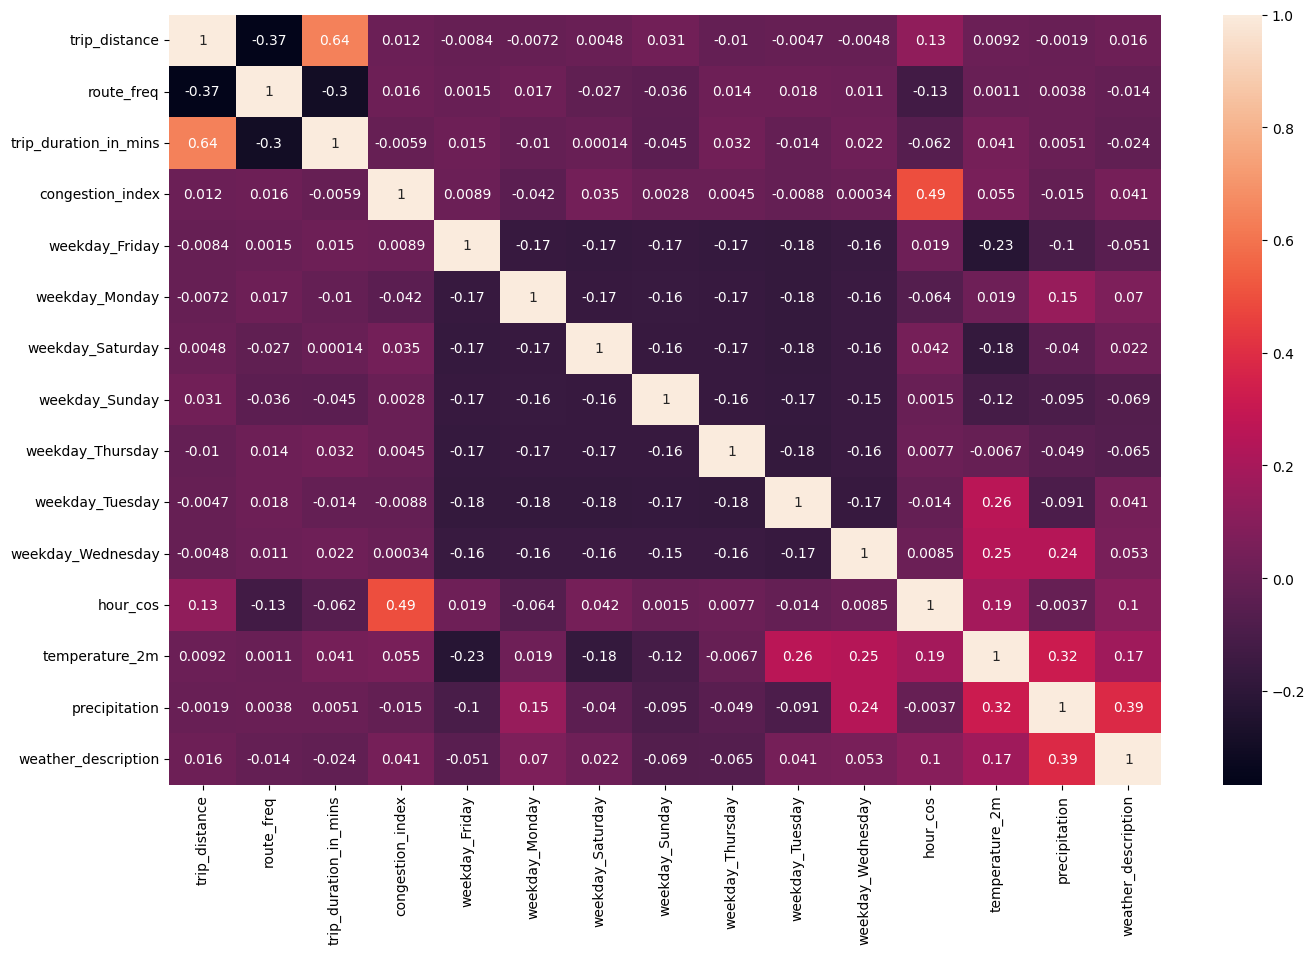

In [1532]:
correlation = yellow_taxi_with_weather_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation, xticklabels=yellow_taxi_with_weather_df.columns, yticklabels=yellow_taxi_with_weather_df.columns, annot=True)

# Building the Prediction Model & Performance Test

## Train-Test-Split

In [1533]:
yellow_taxi_df.drop(columns=['congestion_index','hour_cos'], inplace=True)

In [1537]:
yellow_taxi_df.head(10)

,trip_distance,PULocationID,DOLocationID,route_freq,trip_duration_in_mins,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,pickup_date,pickup_hour
3,0.4585,142,186,1390,0.2319,False,False,False,True,False,False,False,2024-12-01,0
4,2.6355,107,80,55,1.1699,False,False,False,True,False,False,False,2024-12-01,0
5,2.0330,249,141,680,0.3731,False,False,False,True,False,False,False,2024-12-01,0
7,-1.1803,148,148,936,-1.1033,False,False,False,True,False,False,False,2024-12-01,0
9,-0.8429,211,231,1343,-1.0577,False,False,False,True,False,False,False,2024-12-01,0
10,1.4225,231,48,730,0.0669,False,False,False,True,False,False,False,2024-12-01,0
11,-0.3127,68,137,837,-0.3564,False,False,False,True,False,False,False,2024-12-01,0
12,-1.0598,230,162,2838,-1.2944,False,False,False,True,False,False,False,2024-12-01,0
13,0.7477,100,239,796,0.5554,False,False,False,True,False,False,False,2024-12-01,0
15,-1.3971,262,140,3694,-1.6939,False,False,False,True,False,False,False,2024-12-01,0


In [1539]:
yellow_taxi_df.drop(columns=['PULocationID','DOLocationID','pickup_date','pickup_hour'], inplace=True)

In [1540]:
# define the training set ([x_train,y_train] pairs) where indepedent and dependent variables listed above:

x = yellow_taxi_df.drop(columns='trip_duration_in_mins',axis=1) #all columns except trip_duration_in)mins
y = yellow_taxi_df['trip_duration_in_mins']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# reshape(-1,1) y_train (this is not necessary for x_train, since it's multi-Dimensional now):
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

# define the test set ([x_test,y_test] pairs) where indepedent and dependent variables listed above:
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

## Simple Linear Regression

In [1541]:
# define a LinearRegression model and train (i.e. fit) the model using training set:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# We will now assess the model performance with the test set.
# first, predict the price for test set using the model trained above:
Y_pred = linear_model.predict(X_test)

# Scores
print(f'MAE: {metrics.mean_absolute_error(Y_test, Y_pred):.4f}')
print(f'MSE: {metrics.mean_squared_error(Y_test, Y_pred):.4f}')

MAE: 0.5801
MSE: 0.5786


/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


## Random Forest Regression

### Hyperparameter Tuning

Since the dataset is slightly large (3M rows), it might be better to sample the training set, instead of using all of the data for hyperparameter optimisation.

In [1542]:
# Sampling only 10%
_, X_train_sample, _, Y_train_sample = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Hyperparameters to test
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3,5,10,20]
}

# Initialise the model
reg_model = RandomForestRegressor(random_state=42)

# Perform GridSearch with CV k-Fold for Regression
grid_search = RandomizedSearchCV(
    estimator=reg_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train_sample, Y_train_sample)

# Obtain the best parameter and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MAE Score:", -best_score)

Best Parameters: {'n_estimators': 200, 'max_depth': 20}
Best MAE Score: 0.5249554962923823


### Training and Testing

In [1543]:
# Initialise Random Forest Classifier
reg_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],random_state=42, n_jobs=-1)

# Train the model
reg_model.fit(X_train, Y_train)

# Make predictions on the test data
reg_Y_pred = reg_model.predict(X_test)

### Performance Metrics

In [1544]:
# Scores
print(f'MAE: {metrics.mean_absolute_error(Y_test, reg_Y_pred):.4f}')
print(f'MSE: {metrics.mean_squared_error(Y_test, reg_Y_pred):.4f}')

MAE: 0.4939
MSE: 0.4443


Text(0, 0.5, 'Predicted Duration')

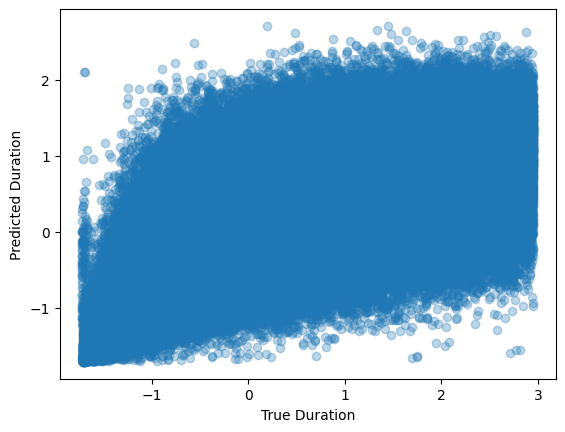

In [1545]:
plt.scatter(Y_test, reg_Y_pred, alpha=0.3)
plt.xlabel("True Duration")
plt.ylabel("Predicted Duration")

### Feature Importance

## XGBoost

Installing XGBoost

In [187]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importing XGBoost

In [1546]:
import xgboost as xgb

### Hyperparameter Tuning

In [1547]:
param_grid = {
    'n_estimators':[50,100,200,300],
    'max_depth':[3,5,7,9,11],
    'learning_rate': [0.01,0.1,0.2]
}

xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_sample, Y_train_sample)

best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters:", best_params_xgb)
print(f"Best MAE from CV: {-best_score_xgb:.4f}")

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best MAE from CV: 0.5165


### Training & Testing

In [1548]:
xgb_model = xgb.XGBRegressor(n_estimators=best_params_xgb['n_estimators'],learning_rate=best_params_xgb['learning_rate'],max_depth=best_params_xgb['max_depth'],random_state=42)

xgb_model.fit(X_train, Y_train)

xgb_y_pred = xgb_model.predict(X_test)

### Performance Metrics

In [1550]:
# Scores
print(f'MAE: {metrics.mean_absolute_error(Y_test, xgb_y_pred):.4f}')
print(f'MSE: {metrics.mean_squared_error(Y_test, xgb_y_pred):.4f}')

MAE: 0.5136
MSE: 0.4720


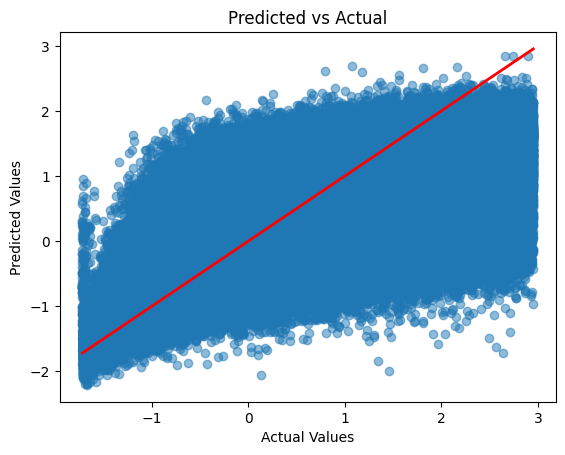

In [ ]:
plt.scatter(Y_test, xgb_y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r', lw=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

## Deep Learning Neural Network

In [1551]:
yellow_taxi_df.sample(10)

,trip_distance,route_freq,trip_duration_in_mins,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
662492,-0.0396,162,0.1212,True,False,False,False,False,False,False
977427,0.6192,7147,1.1807,False,True,False,False,False,False,False
3083641,-0.7866,4452,-0.6582,False,False,True,False,False,False,False
2719306,0.6674,602,0.0821,False,True,False,False,False,False,False
1483522,-0.6340,1905,-0.8710,True,False,False,False,False,False,False
2239157,-0.1440,4417,2.3075,False,False,False,False,True,False,False
2184384,-0.2564,7441,-0.8645,False,False,False,False,False,False,True
3025269,-0.9553,2575,-1.4963,True,False,False,False,False,False,False
2525313,-0.7143,3825,-0.5388,False,False,True,False,False,False,False
2830029,-0.9393,321,-1.0729,False,False,False,False,False,False,True


### Training and Testing

In [1552]:
# defining independent (X) and dependent (Y) variables
X = yellow_taxi_df.drop(columns=['trip_duration_in_mins'], axis=1)  # Features
Y = yellow_taxi_df['trip_duration_in_mins']  # Target variable

# sampling 4000 rows from X and Y
X_sample = X.sample(n=3000, random_state=42)  # Randomly sample 4000 rows
Y_sample = Y.loc[X_sample.index]  # Match Y to the sampled X rows

# converting to NumPy arrays
X_sample = X_sample.values
Y_sample = Y_sample.values.reshape(-1, 1)  # Ensure Y is 2D

# scaling the features of the sampled data
scaler = StandardScaler()
X_sample = scaler.fit_transform(X_sample)

In [1553]:
# defining 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cvscores = []  # store mean absolute error (MAE) scores

for train_index, test_index in kfold.split(X_sample, Y_sample):
    # splitting data into training and validation sets for this fold
    X_train, X_val = X_sample[train_index], X_sample[test_index]
    Y_train_fold, Y_val = Y_sample[train_index], Y_sample[test_index]

    # building the model
    model = Sequential([
        Dense(64, activation='relu', input_dim=X.shape[1]),  # Input layer
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')  # Output layer for regression
    ])

    # compiling the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # training the model with validation data
    history = model.fit(X_train, Y_train_fold, epochs=100, batch_size=32, 
                        validation_data=(X_val, Y_val), verbose=0)

    # evaluating the model
    loss, mae = model.evaluate(X_val, Y_val, verbose=0)

    # printing and storing MAE
    print(f"Fold MAE: {mae:.4f}")
    cvscores.append(mae)

# Print overall performance
print("Mean MAE: %.4f (+/- %.4f)" % (np.mean(cvscores), np.std(cvscores)))

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold MAE: 0.6086
Fold MAE: 0.5609
Fold MAE: 0.5751
Fold MAE: 0.5657
Fold MAE: 0.5704
Fold MAE: 0.5421
Fold MAE: 0.5602
Fold MAE: 0.5582
Fold MAE: 0.5697
Fold MAE: 0.5649
Mean MAE: 0.5676 (+/- 0.0161)


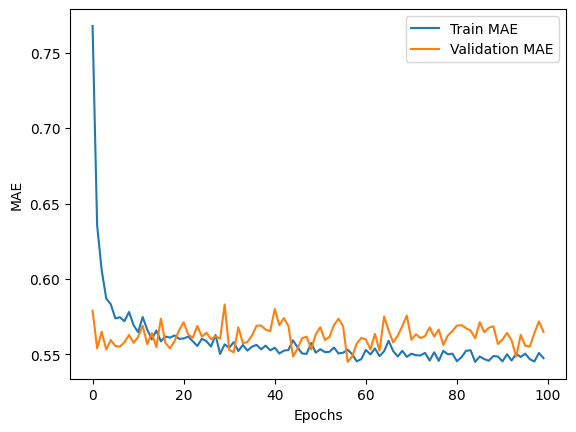

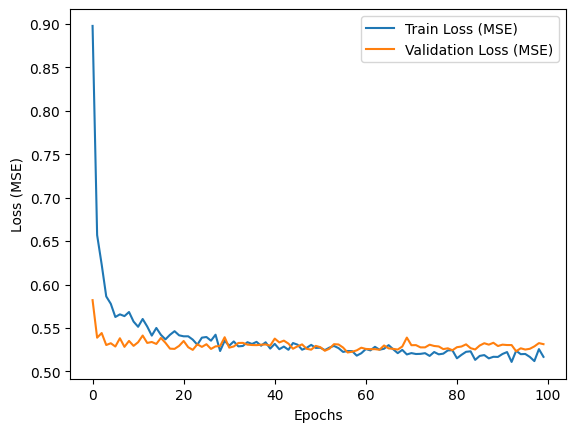

In [1554]:
# Plot training & validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()